In [1]:
import pandas as pd
import os as os
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [2]:
ucb = pd.read_csv('ucb_data.csv')


In [27]:
ucb.shape

(10000, 6)

In [5]:
#Initialization
user = ucb.user
ucb = ucb.drop(['user'], axis = 1)   #Dropping user field
N = 10000               # no of iterations
d = 6                   # no of ad versions
total_reward_rand = 0   #variable to store total rewards or clicks throuout the iterations
  
#Loop through the iterations and random selection of ad
ad_selected = []       #List to store diff ad versions selected over iterations 
for i in range(0,N):   #For loop from 0 to 9999 
    ad = random.randrange(d)
    ad_selected.append(ad)
    reward = ucb.values[i,ad]
    total_reward_rand = total_reward_rand + reward

total clicks without any strategy: 1319


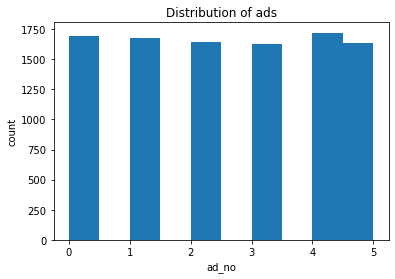

In [6]:
print('total clicks without any strategy: {}'.format(total_reward_rand))
#plot- Distribution of ad_selected
plt.hist(ad_selected)
plt.title('Distribution of ads')
plt.xlabel('ad_no')
plt.ylabel('count')
plt.show()

In [24]:
#Initialization
N = 10000               # no of iterations
d = 6                   # no of ad versions
ad_selected = []       #List to store diff ad versions selected over iterations                 
no_selection = [0] * d #List to store no of times diff ad versions selected
sum_reward = [0] * d   #List to store no of clicks diff ad versions get upto round N
total_reward_ucb = 0   # To store Total No clicks upto round N

In [25]:
no_selection

[0, 0, 0, 0, 0, 0]

In [26]:
#loop through no of rounds 
for i in range(0,N):
    max_upper_bnd = 0     # Variable to store value of max UCB and resets at each round
    ad = 0               #temporary Variable to store ad version having highest UCB and starts with ad1 
    for j in range(0,d):  #Here loop starts with 0 index till index 5 
        print(ad)
        print(sum_reward[ad])
        if (no_selection[j] > 0):
            
               avg_reward = sum_reward[j]/no_selection[j]  
               delta_j = (math.sqrt(3/2) * math.log(i + 1)/no_selection[j])    
               upper_bnd = avg_reward + delta_j            #UCB calculation for ad version j for iteration i
        else:
           upper_bnd = 1e5                  #High value assigned during initial rounds
        if upper_bnd > max_upper_bnd:
           max_upper_bnd = upper_bnd
           ad = j
    ad_selected.append(ad)                   #List updates with ad selected at each round
    no_selection[ad] = no_selection[ad] + 1  
    reward = ucb.values[i,ad]                #Picks the user action- click/no click for selected ad at round i
    sum_reward[ad] = sum_reward[ad] + reward     #list updates to store rewards for diff add version     
    total_reward_ucb = total_reward_ucb + reward #Total rewards/clicks updates after every round

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
0
1
0
0
0
0
0
0
0
2
0
2
0
2
0
0
0
0
0
0
0
0
0
3
0
3
0
0
0
0
0
0
0
0
0
0
0
4
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
0
1
0
0
0
0
0
0
0
2
0
2
0
2
0
0
0
0
0
0
0
0
0
3
0
3
0
0
0
0
0
0
0
0
0
0
0
4
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
0
1
0
0
0
0
0
0
0
2
0
2
0
2
0
0
0
0
0
0
0
0
0
3
0
3
0
0
0
0
0
0
0
0
0
0
0
4
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
0
1
0
0
0
0
0
0
0
2
0
2
0
2
0
0
0
0
0
0
0
0
0
3
0
3
0
0
0
0
0
0
0
0
0
0
0
4
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
0
1
0
0
0
0
0
0
0
2
0
2
0
2
0
0
0
0
0
0
0
0
0
3
0
3
0
0
0
0
0
0
0
0
0
3
1
4
0
0
0
0
0
0
0
0
0
3
1
3
1
0
0
0
0
0
0
0
0
3
1
3
1
0
0
0
0
0
0
0
0
3
2
3
2
0
0
0
0
0
0
0
0
3
2
3
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
0
1
0
0
0
0
0
1
1
1
1
1
1
1
1
0
0
0
0
1
1
2
0
2
0
2
0
0
0
0
0
1
1
1
1
3
2
4
0
0
0
0
0
1
1
1
1
3
2
3
2
0
0
0
0
1
1
1
1
3
2
3
2
0
0
0
0
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0


28
2
28
4
2
0
1
0
1
1
15
2
28
2
28
2
28
0
1
0
1
1
15
1
15
3
4
3
4
0
1
0
1
1
15
1
15
1
15
1
15
0
1
0
1
0
1
2
28
2
28
2
28
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
15
2
28
2
28
2
28
0
1
0
1
1
15
2
28
2
28
2
28
0
1
0
1
1
15
2
29
2
29
2
29
0
1
0
1
1
15
2
29
2
29
2
29
0
1
0
1
1
15
2
29
2
29
2
29
0
1
0
1
1
15
2
30
2
30
2
30
0
1
0
1
1
15
2
31
2
31
2
31
0
1
0
1
1
15
2
32
2
32
2
32
0
1
0
1
1
15
2
32
2
32
2
32
0
1
0
1
1
15
2
32
2
32
2
32
0
1
0
1
1
15
2
32
2
32
2
32
0
1
0
1
1
15
2
33
2
33
2
33
0
1
0
1
1
15
2
33
2
33
2
33
0
1
0
1
1
15
2
33
2
33
2
33
0
1
0
1
1
15
2
34
2
34
2
34
0
1
0
1
1
15
2
35
2
35
2
35
0
1
0
1
1
15
2
35
2
35
2
35
0
1
0
1
1
15
2
35
2
35
2
35
0
1
0
1
1
15
2
35
2
35
2
35
0
1
0
1
1
15
2
35
2
35
2
35
0
1
0
1
1
15
2
35
2
35
2
35
0
1
0
1
1
15
2
35
2
35
2
35
0
1
0
1
1
15
2
35
2
35
2
35
0
1
0
1
1
15
2
35
2
35
2
35
0
1
0
1
1
15
2
35
2
35
2
35
0
1
0
1
1
15
2
35
2
35
2
35
0
1
0
1
1
15
1
15
1
15
1
15
0
1
0
1
1
15
2
35
3
4
4
2
0
1
0
1
1
15
2
35
3
4
3
4
0
1
0
1
1
15
2
35
3
5
3
5
0
1
0
1
1
15
2
35
3
5

0
3
0
3
1
24
2
69
2
69
2
69
0
3
0
3
1
24
2
69
2
69
2
69
0
3
0
3
1
24
1
24
1
24
1
24
0
3
0
3
0
3
2
69
2
69
2
69
0
3
0
3
0
3
2
70
2
70
2
70
0
3
0
3
0
3
2
71
2
71
2
71
0
3
0
3
0
3
2
71
2
71
2
71
0
3
0
3
0
3
2
72
2
72
2
72
0
3
0
3
0
3
2
72
2
72
2
72
0
3
0
3
0
3
2
72
2
72
2
72
0
3
0
3
0
3
2
72
2
72
2
72
0
3
0
3
0
3
2
72
2
72
2
72
0
3
0
3
0
3
2
73
2
73
2
73
0
3
0
3
0
3
2
73
2
73
2
73
0
3
0
3
0
3
2
73
2
73
2
73
0
3
0
3
0
3
2
74
2
74
2
74
0
3
0
3
0
3
2
74
2
74
2
74
0
3
0
3
0
3
2
74
2
74
2
74
0
3
0
3
0
3
2
74
2
74
2
74
0
3
0
3
0
3
2
74
2
74
2
74
0
3
0
3
0
3
2
74
2
74
2
74
0
3
0
3
0
3
2
75
2
75
2
75
0
3
0
3
0
3
2
75
2
75
2
75
0
3
0
3
0
3
2
75
2
75
2
75
0
3
0
3
0
3
2
76
2
76
2
76
0
3
0
3
0
3
2
76
2
76
2
76
0
3
0
3
0
3
2
76
2
76
2
76
0
3
0
3
0
3
2
76
2
76
2
76
0
3
0
3
0
3
2
76
2
76
2
76
0
3
0
3
0
3
2
77
2
77
2
77
0
3
0
3
0
3
2
77
2
77
2
77
0
3
0
3
0
3
2
78
2
78
2
78
0
3
0
3
0
3
2
79
2
79
2
79
0
3
0
3
0
3
2
79
2
79
2
79
0
3
0
3
0
3
2
79
2
79
2
79
0
3
0
3
0
3
2
80
2
80
2
80
0
3
0
3
0
3
2
81
2
81
2
8

2
118
0
3
0
3
1
25
1
25
1
25
1
25
0
3
0
3
1
25
2
118
2
118
2
118
0
3
0
3
1
25
2
118
2
118
4
8
0
3
0
3
1
25
2
118
2
118
2
118
0
3
0
3
1
25
2
118
3
11
3
11
0
3
0
3
1
25
2
118
3
12
3
12
0
3
0
3
1
25
2
118
3
12
3
12
0
3
0
3
1
25
2
118
3
12
3
12
0
3
0
3
1
25
2
118
3
12
3
12
0
3
0
3
1
25
2
118
3
12
3
12
0
3
0
3
1
25
2
118
2
118
2
118
0
3
0
3
1
25
2
119
2
119
2
119
0
3
0
3
1
25
2
119
2
119
2
119
0
3
0
3
1
25
2
119
2
119
2
119
0
3
0
3
1
25
2
119
2
119
2
119
0
3
0
3
1
25
2
119
2
119
2
119
0
3
0
3
1
25
2
119
2
119
2
119
0
3
0
3
1
25
1
25
1
25
1
25
0
3
0
3
1
25
2
119
2
119
2
119
0
3
0
3
1
25
2
119
2
119
2
119
0
3
0
3
1
25
2
119
2
119
2
119
0
3
0
3
1
25
2
119
2
119
2
119
0
3
0
3
1
25
1
25
1
25
1
25
0
3
0
3
1
26
1
26
1
26
1
26
0
3
0
3
1
27
1
27
1
27
1
27
0
3
0
3
1
27
1
27
1
27
1
27
0
3
0
3
1
27
1
27
1
27
1
27
0
3
0
3
1
27
1
27
1
27
1
27
0
3
0
3
1
27
1
27
1
27
1
27
0
3
0
3
1
27
1
27
1
27
1
27
0
3
0
3
1
27
1
27
1
27
1
27
0
3
0
3
1
27
1
27
1
27
1
27
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
1
27
1
27
3
12
4
8
0

3
0
3
0
3
2
181
2
181
2
181
0
3
0
3
0
3
2
181
2
181
2
181
0
3
0
3
0
3
2
181
2
181
2
181
0
3
0
3
0
3
2
181
2
181
2
181
0
3
0
3
0
3
2
181
2
181
2
181
0
3
0
3
0
3
2
181
2
181
2
181
0
3
0
3
0
3
2
181
2
181
2
181
0
3
0
3
0
3
2
181
2
181
2
181
0
3
0
3
0
3
2
181
2
181
2
181
0
3
0
3
0
3
2
181
2
181
2
181
0
3
0
3
0
3
2
181
2
181
2
181
0
3
0
3
0
3
2
181
2
181
2
181
0
3
0
3
0
3
2
181
2
181
2
181
0
3
0
3
0
3
2
181
2
181
2
181
0
3
0
3
0
3
2
181
2
181
2
181
0
3
0
3
0
3
2
181
2
181
2
181
0
3
0
3
0
3
2
182
2
182
2
182
0
3
0
3
0
3
2
182
2
182
2
182
0
3
0
3
0
3
2
182
2
182
2
182
0
3
0
3
0
3
2
182
2
182
2
182
0
3
0
3
0
3
2
182
2
182
2
182
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
2
182
2
182
2
182
0
3
0
3
0
3
2
182
2
182
2
182
0
3
0
3
0
3
2
182
2
182
2
182
0
3
0
3
0
3
2
182
2
182
2
182
0
3
0
3
0
3
2
183
2
183
2
183
0
3
0
3
0
3
2
183
2
183
2
183
0
3
0
3
0
3
2
183
2
183
2
183
0
3
0
3
0
3
2
184
2
184
2
184
0
3
0
3
0
3
2
184
2
184
2
184
0
3
0
3
0
3
2
184
2
184
2
184
0
3
0
3
0
3
2
184
2
184
2
184
0
3
0
3
0
3
2
184


1
27
2
245
2
245
2
245
0
4
0
4
1
27
2
245
2
245
2
245
0
4
0
4
1
27
2
246
2
246
2
246
0
4
0
4
1
27
2
247
2
247
2
247
0
4
0
4
1
27
2
247
2
247
2
247
0
4
0
4
1
27
2
248
2
248
2
248
0
4
0
4
1
27
2
248
2
248
2
248
0
4
0
4
1
27
2
248
2
248
2
248
0
4
0
4
1
27
2
248
2
248
2
248
0
4
0
4
1
27
2
248
2
248
2
248
0
4
0
4
1
27
2
248
2
248
2
248
0
4
0
4
1
27
2
248
2
248
2
248
0
4
0
4
1
27
2
248
2
248
2
248
0
4
0
4
1
27
2
248
2
248
2
248
0
4
0
4
1
27
2
248
2
248
2
248
0
4
0
4
1
27
2
248
2
248
2
248
0
4
0
4
1
27
2
248
2
248
2
248
0
4
0
4
1
27
2
248
2
248
2
248
0
4
0
4
1
27
2
249
2
249
2
249
0
4
0
4
1
27
2
250
2
250
2
250
0
4
0
4
1
27
2
250
2
250
2
250
0
4
0
4
1
27
2
250
2
250
2
250
0
4
0
4
1
27
2
250
2
250
2
250
0
4
0
4
1
27
2
250
2
250
2
250
0
4
0
4
1
27
2
250
2
250
2
250
0
4
0
4
1
27
2
250
2
250
2
250
0
4
0
4
1
27
2
250
2
250
2
250
0
4
0
4
1
27
2
250
2
250
2
250
0
4
0
4
1
27
2
250
2
250
2
250
0
4
0
4
1
27
2
251
2
251
2
251
0
4
0
4
1
27
2
251
2
251
2
251
0
4
0
4
1
27
2
251
2
251
2
251
0
4
0
4
1
27
2
2

309
0
4
0
4
0
4
2
309
2
309
2
309
0
4
0
4
0
4
2
309
2
309
2
309
0
4
0
4
0
4
2
310
2
310
2
310
0
4
0
4
0
4
2
311
2
311
2
311
0
4
0
4
0
4
2
311
2
311
2
311
0
4
0
4
0
4
2
311
2
311
2
311
0
4
0
4
0
4
2
311
2
311
2
311
0
4
0
4
0
4
2
311
2
311
2
311
0
4
0
4
0
4
2
311
2
311
2
311
0
4
0
4
0
4
2
311
2
311
2
311
0
4
0
4
0
4
2
311
2
311
2
311
0
4
0
4
0
4
2
312
2
312
2
312
0
4
0
4
0
4
2
312
2
312
2
312
0
4
0
4
0
4
2
313
2
313
2
313
0
4
0
4
0
4
2
313
2
313
2
313
0
4
0
4
0
4
2
313
2
313
2
313
0
4
0
4
0
4
2
313
2
313
2
313
0
4
0
4
0
4
2
313
2
313
2
313
0
4
0
4
0
4
2
313
2
313
2
313
0
4
0
4
0
4
2
313
2
313
2
313
0
4
0
4
0
4
2
313
2
313
2
313
0
4
0
4
0
4
2
314
2
314
2
314
0
4
0
4
0
4
2
314
2
314
2
314
0
4
0
4
0
4
2
314
2
314
2
314
0
4
0
4
0
4
2
314
2
314
2
314
0
4
0
4
0
4
2
315
2
315
2
315
0
4
0
4
0
4
2
315
2
315
2
315
0
4
0
4
0
4
2
315
2
315
2
315
0
4
0
4
0
4
2
315
2
315
2
315
0
4
0
4
0
4
2
315
2
315
2
315
0
4
0
4
0
4
2
315
2
315
2
315
0
4
0
4
0
4
2
316
2
316
2
316
0
4
0
4
0
4
2
316
2
316
2
316
0
4
0


2
399
2
399
2
399
0
4
0
4
0
4
2
399
2
399
2
399
0
4
0
4
0
4
2
399
2
399
2
399
0
4
0
4
0
4
2
399
2
399
2
399
0
4
0
4
0
4
2
399
2
399
2
399
0
4
0
4
0
4
2
399
2
399
2
399
0
4
0
4
0
4
2
399
2
399
2
399
0
4
0
4
0
4
2
400
2
400
2
400
0
4
0
4
0
4
2
401
2
401
2
401
0
4
0
4
0
4
2
401
2
401
2
401
0
4
0
4
0
4
2
401
2
401
2
401
0
4
0
4
0
4
2
401
2
401
2
401
0
4
0
4
0
4
2
402
2
402
2
402
0
4
0
4
0
4
2
403
2
403
2
403
0
4
0
4
0
4
2
403
2
403
2
403
0
4
0
4
0
4
2
403
2
403
2
403
0
4
0
4
0
4
2
404
2
404
2
404
0
4
0
4
0
4
2
404
2
404
2
404
0
4
0
4
0
4
2
404
2
404
2
404
0
4
0
4
0
4
2
404
2
404
2
404
0
4
0
4
0
4
2
404
2
404
2
404
0
4
0
4
0
4
2
404
2
404
2
404
0
4
0
4
0
4
2
404
2
404
2
404
0
4
0
4
0
4
2
404
2
404
2
404
0
4
0
4
0
4
2
405
2
405
2
405
0
4
0
4
0
4
2
406
2
406
2
406
0
4
0
4
0
4
2
406
2
406
2
406
0
4
0
4
0
4
2
406
2
406
2
406
0
4
0
4
0
4
2
407
2
407
2
407
0
4
0
4
0
4
2
407
2
407
2
407
0
4
0
4
0
4
2
408
2
408
2
408
0
4
0
4
0
4
2
408
2
408
2
408
0
4
0
4
0
4
2
409
2
409
2
409
0
4
0
4
0
4
2
409
2
40

4
0
4
0
4
2
453
2
453
2
453
0
4
0
4
0
4
2
453
2
453
2
453
0
4
0
4
0
4
2
454
2
454
2
454
0
4
0
4
0
4
2
454
2
454
2
454
0
4
0
4
0
4
2
454
2
454
2
454
0
4
0
4
0
4
2
454
2
454
2
454
0
4
0
4
0
4
2
454
2
454
2
454
0
4
0
4
0
4
2
454
2
454
2
454
0
4
0
4
0
4
2
455
2
455
2
455
0
4
0
4
0
4
2
455
2
455
2
455
0
4
0
4
0
4
2
455
2
455
2
455
0
4
0
4
0
4
2
456
2
456
2
456
0
4
0
4
0
4
2
456
2
456
2
456
0
4
0
4
0
4
2
457
2
457
2
457
0
4
0
4
0
4
2
457
2
457
2
457
0
4
0
4
0
4
2
457
2
457
2
457
0
4
0
4
0
4
2
457
2
457
2
457
0
4
0
4
0
4
2
457
2
457
2
457
0
4
0
4
0
4
2
457
2
457
2
457
0
4
0
4
0
4
2
457
2
457
2
457
0
4
0
4
0
4
2
457
2
457
2
457
0
4
0
4
0
4
2
458
2
458
2
458
0
4
0
4
0
4
2
458
2
458
2
458
0
4
0
4
0
4
2
458
2
458
2
458
0
4
0
4
0
4
2
458
2
458
2
458
0
4
0
4
0
4
2
458
2
458
2
458
0
4
0
4
0
4
2
458
2
458
2
458
0
4
0
4
0
4
2
458
2
458
2
458
0
4
0
4
0
4
2
458
2
458
2
458
0
4
0
4
0
4
2
458
2
458
2
458
0
4
0
4
0
4
2
459
2
459
2
459
0
4
0
4
0
4
2
459
2
459
2
459
0
4
0
4
0
4
2
460
2
460
2
460
0
4
0
4
0
4


544
0
4
0
4
0
4
2
544
2
544
2
544
0
4
0
4
0
4
2
544
2
544
2
544
0
4
0
4
0
4
2
544
2
544
2
544
0
4
0
4
0
4
2
544
2
544
2
544
0
4
0
4
0
4
2
544
2
544
2
544
0
4
0
4
0
4
2
544
2
544
2
544
0
4
0
4
0
4
2
544
2
544
2
544
0
4
0
4
0
4
2
544
2
544
2
544
0
4
0
4
0
4
2
545
2
545
2
545
0
4
0
4
0
4
2
545
2
545
2
545
0
4
0
4
0
4
2
545
2
545
2
545
0
4
0
4
0
4
2
545
2
545
2
545
0
4
0
4
0
4
2
545
2
545
2
545
0
4
0
4
0
4
2
546
2
546
2
546
0
4
0
4
0
4
2
546
2
546
2
546
0
4
0
4
0
4
2
546
2
546
2
546
0
4
0
4
0
4
2
546
2
546
2
546
0
4
0
4
0
4
2
546
2
546
2
546
0
4
0
4
0
4
2
546
2
546
2
546
0
4
0
4
0
4
2
547
2
547
2
547
0
4
0
4
0
4
2
547
2
547
2
547
0
4
0
4
0
4
2
547
2
547
2
547
0
4
0
4
0
4
2
547
2
547
2
547
0
4
0
4
0
4
2
547
2
547
2
547
0
4
0
4
0
4
2
547
2
547
2
547
0
4
0
4
0
4
2
547
2
547
2
547
0
4
0
4
0
4
2
548
2
548
2
548
0
4
0
4
0
4
2
549
2
549
2
549
0
4
0
4
0
4
2
549
2
549
2
549
0
4
0
4
0
4
2
549
2
549
2
549
0
4
0
4
0
4
2
549
2
549
2
549
0
4
0
4
0
4
2
549
2
549
2
549
0
4
0
4
0
4
2
549
2
549
2
549
0
4
0


2
612
2
612
0
4
0
4
0
4
2
612
2
612
2
612
0
4
0
4
0
4
2
613
2
613
2
613
0
4
0
4
0
4
2
613
2
613
2
613
0
4
0
4
0
4
2
613
2
613
2
613
0
4
0
4
0
4
2
613
2
613
2
613
0
4
0
4
0
4
2
613
2
613
2
613
0
4
0
4
0
4
2
613
2
613
2
613
0
4
0
4
0
4
2
613
2
613
2
613
0
4
0
4
0
4
2
613
2
613
2
613
0
4
0
4
0
4
2
613
2
613
2
613
0
4
0
4
0
4
2
613
2
613
2
613
0
4
0
4
0
4
2
613
2
613
2
613
0
4
0
4
0
4
2
613
2
613
2
613
0
4
0
4
0
4
2
613
2
613
2
613
0
4
0
4
0
4
2
613
2
613
2
613
0
4
0
4
0
4
2
614
2
614
2
614
0
4
0
4
0
4
2
614
2
614
2
614
0
4
0
4
0
4
2
614
2
614
2
614
0
4
0
4
0
4
2
614
2
614
2
614
0
4
0
4
0
4
2
614
3
13
3
13
0
4
0
4
0
4
2
614
2
614
2
614
0
4
0
4
0
4
2
614
2
614
2
614
0
4
0
4
0
4
2
614
2
614
2
614
0
4
0
4
0
4
2
614
2
614
2
614
0
4
0
4
0
4
2
614
2
614
2
614
0
4
0
4
0
4
2
615
2
615
2
615
0
4
0
4
0
4
2
615
2
615
2
615
0
4
0
4
0
4
2
615
2
615
2
615
0
4
0
4
0
4
2
615
2
615
2
615
0
4
0
4
0
4
2
615
2
615
2
615
0
4
0
4
0
4
2
615
2
615
2
615
0
4
0
4
0
4
2
615
2
615
2
615
0
4
0
4
0
4
2
616
2
616
2
616


0
8
2
695
2
695
2
695
0
8
0
8
0
8
2
696
2
696
2
696
0
8
0
8
0
8
2
697
2
697
2
697
0
8
0
8
0
8
2
698
2
698
2
698
0
8
0
8
0
8
2
698
2
698
2
698
0
8
0
8
0
8
2
698
2
698
2
698
0
8
0
8
0
8
2
699
2
699
2
699
0
8
0
8
0
8
2
699
2
699
2
699
0
8
0
8
0
8
2
699
2
699
2
699
0
8
0
8
0
8
2
699
2
699
2
699
0
8
0
8
0
8
2
699
2
699
2
699
0
8
0
8
0
8
2
699
2
699
2
699
0
8
0
8
0
8
2
699
2
699
2
699
0
8
0
8
0
8
2
699
2
699
2
699
0
8
0
8
0
8
2
699
2
699
2
699
0
8
0
8
0
8
2
699
2
699
2
699
0
8
0
8
0
8
2
699
2
699
2
699
0
8
0
8
0
8
2
699
2
699
2
699
0
8
0
8
0
8
2
699
2
699
2
699
0
8
0
8
0
8
2
699
2
699
2
699
0
8
0
8
0
8
2
699
2
699
2
699
0
8
0
8
0
8
2
699
2
699
2
699
0
8
0
8
0
8
2
699
2
699
2
699
0
8
0
8
0
8
2
699
2
699
2
699
0
8
0
8
0
8
2
699
2
699
2
699
0
8
0
8
0
8
2
699
2
699
2
699
0
8
0
8
0
8
2
699
2
699
2
699
0
8
0
8
0
8
2
699
2
699
2
699
0
8
0
8
0
8
2
699
2
699
2
699
0
8
0
8
0
8
2
699
2
699
2
699
0
8
0
8
0
8
2
699
2
699
2
699
0
8
0
8
0
8
2
700
2
700
2
700
0
8
0
8
0
8
2
700
2
700
2
700
0
8
0
8
0
8
2
700


755
2
755
2
755
0
8
0
8
0
8
2
755
2
755
2
755
0
8
0
8
0
8
2
756
2
756
2
756
0
8
0
8
0
8
2
757
2
757
2
757
0
8
0
8
0
8
2
757
2
757
2
757
0
8
0
8
0
8
2
757
2
757
2
757
0
8
0
8
0
8
2
757
2
757
2
757
0
8
0
8
0
8
2
757
2
757
2
757
0
8
0
8
0
8
2
757
2
757
2
757
0
8
0
8
0
8
2
757
2
757
2
757
0
8
0
8
0
8
2
758
2
758
2
758
0
8
0
8
0
8
2
758
2
758
2
758
0
8
0
8
0
8
2
758
2
758
2
758
0
8
0
8
0
8
2
758
2
758
2
758
0
8
0
8
0
8
2
758
2
758
2
758
0
8
0
8
0
8
2
759
2
759
2
759
0
8
0
8
0
8
2
759
2
759
2
759
0
8
0
8
0
8
2
759
2
759
2
759
0
8
0
8
0
8
2
760
2
760
2
760
0
8
0
8
0
8
2
760
2
760
2
760
0
8
0
8
0
8
2
760
2
760
2
760
0
8
0
8
0
8
2
760
2
760
2
760
0
8
0
8
0
8
2
760
2
760
2
760
0
8
0
8
0
8
2
760
2
760
2
760
0
8
0
8
0
8
2
760
2
760
2
760
0
8
0
8
0
8
2
760
2
760
2
760
0
8
0
8
0
8
2
760
2
760
2
760
0
8
0
8
0
8
2
761
2
761
2
761
0
8
0
8
0
8
2
761
2
761
2
761
0
8
0
8
0
8
2
762
2
762
2
762
0
8
0
8
0
8
2
763
2
763
2
763
0
8
0
8
0
8
2
763
2
763
2
763
0
8
0
8
0
8
2
763
2
763
2
763
0
8
0
8
0
8
2
763
2
763


2
820
2
820
2
820
0
8
0
8
0
8
2
820
2
820
2
820
0
8
0
8
0
8
2
820
2
820
2
820
0
8
0
8
0
8
2
820
2
820
2
820
0
8
0
8
0
8
2
820
2
820
2
820
0
8
0
8
0
8
2
820
2
820
2
820
0
8
0
8
0
8
2
820
2
820
2
820
0
8
0
8
0
8
2
820
2
820
2
820
0
8
0
8
0
8
2
820
2
820
2
820
0
8
0
8
0
8
2
820
2
820
2
820
0
8
0
8
0
8
2
820
2
820
2
820
0
8
0
8
0
8
2
820
2
820
2
820
0
8
0
8
0
8
2
820
2
820
2
820
0
8
0
8
0
8
2
820
2
820
2
820
0
8
0
8
0
8
2
821
2
821
2
821
0
8
0
8
0
8
2
821
2
821
2
821
0
8
0
8
0
8
2
822
2
822
2
822
0
8
0
8
0
8
2
822
2
822
2
822
0
8
0
8
0
8
2
823
2
823
2
823
0
8
0
8
0
8
2
823
2
823
2
823
0
8
0
8
0
8
2
823
2
823
2
823
0
8
0
8
0
8
2
824
2
824
2
824
0
8
0
8
0
8
2
825
2
825
2
825
0
8
0
8
0
8
2
825
2
825
2
825
0
8
0
8
0
8
2
825
2
825
2
825
0
8
0
8
0
8
2
826
2
826
2
826
0
8
0
8
0
8
2
826
2
826
2
826
0
8
0
8
0
8
2
826
2
826
2
826
0
8
0
8
0
8
2
827
2
827
2
827
0
8
0
8
0
8
2
827
2
827
2
827
0
8
0
8
0
8
2
827
2
827
2
827
0
8
0
8
0
8
2
827
2
827
2
827
0
8
0
8
0
8
2
827
2
827
2
827
0
8
0
8
0
8
2
827
2
82

927
0
8
0
8
0
8
2
927
2
927
2
927
0
8
0
8
0
8
2
927
2
927
2
927
0
8
0
8
0
8
2
927
2
927
2
927
0
8
0
8
0
8
2
927
2
927
2
927
0
8
0
8
0
8
2
928
2
928
2
928
0
8
0
8
0
8
2
928
2
928
2
928
0
8
0
8
0
8
2
928
2
928
2
928
0
8
0
8
0
8
2
928
2
928
2
928
0
8
0
8
0
8
2
929
2
929
2
929
0
8
0
8
0
8
2
929
2
929
2
929
0
8
0
8
0
8
2
929
2
929
2
929
0
8
0
8
0
8
2
929
2
929
2
929
0
8
0
8
0
8
2
929
2
929
2
929
0
8
0
8
0
8
2
929
2
929
2
929
0
8
0
8
0
8
2
929
2
929
2
929
0
8
0
8
0
8
2
930
2
930
2
930
0
8
0
8
0
8
2
930
2
930
2
930
0
8
0
8
0
8
2
930
2
930
2
930
0
8
0
8
0
8
2
930
2
930
2
930
0
8
0
8
0
8
2
931
2
931
2
931
0
8
0
8
0
8
2
931
2
931
2
931
0
8
0
8
0
8
2
931
2
931
2
931
0
8
0
8
0
8
2
932
2
932
2
932
0
8
0
8
0
8
2
932
2
932
2
932
0
8
0
8
0
8
2
932
2
932
2
932
0
8
0
8
0
8
2
933
2
933
2
933
0
8
0
8
0
8
2
934
2
934
2
934
0
8
0
8
0
8
2
934
2
934
2
934
0
8
0
8
0
8
2
934
2
934
2
934
0
8
0
8
0
8
2
934
2
934
2
934
0
8
0
8
0
8
2
934
2
934
2
934
0
8
0
8
0
8
2
934
2
934
2
934
0
8
0
8
0
8
2
934
2
934
2
934
0
8
0


0
8
0
8
0
8
2
981
2
981
2
981
0
8
0
8
0
8
2
981
2
981
2
981
0
8
0
8
0
8
2
981
2
981
2
981
0
8
0
8
0
8
2
982
2
982
2
982
0
8
0
8
0
8
2
982
2
982
2
982
0
8
0
8
0
8
2
982
2
982
2
982
0
8
0
8
0
8
2
982
2
982
2
982
0
8
0
8
0
8
2
982
2
982
2
982
0
8
0
8
0
8
2
983
2
983
2
983
0
8
0
8
0
8
2
983
2
983
2
983
0
8
0
8
0
8
2
983
2
983
2
983
0
8
0
8
0
8
2
983
2
983
2
983
0
8
0
8
0
8
2
983
2
983
2
983
0
8
0
8
0
8
2
983
2
983
2
983
0
8
0
8
0
8
2
984
2
984
2
984
0
8
0
8
0
8
2
985
2
985
2
985
0
8
0
8
0
8
2
985
2
985
2
985
0
8
0
8
0
8
2
985
2
985
2
985
0
8
0
8
0
8
2
985
2
985
2
985
0
8
0
8
0
8
2
985
2
985
2
985
0
8
0
8
0
8
2
986
2
986
2
986
0
8
0
8
0
8
2
986
2
986
2
986
0
8
0
8
0
8
2
986
2
986
2
986
0
8
0
8
0
8
2
986
2
986
2
986
0
8
0
8
0
8
2
987
2
987
2
987
0
8
0
8
0
8
2
987
2
987
2
987
0
8
0
8
0
8
2
988
2
988
2
988
0
8
0
8
0
8
2
988
2
988
2
988
0
8
0
8
0
8
2
988
2
988
2
988
0
8
0
8
0
8
2
988
2
988
2
988
0
8
0
8
0
8
2
988
2
988
2
988
0
8
0
8
0
8
2
988
2
988
2
988
0
8
0
8
0
8
2
989
2
989
2
989
0
8
0
8
0


2
1024
2
1024
0
8
0
8
0
8
2
1024
2
1024
2
1024
0
8
0
8
0
8
2
1024
2
1024
2
1024
0
8
0
8
0
8
2
1025
2
1025
2
1025
0
8
0
8
0
8
2
1025
2
1025
2
1025
0
8
0
8
0
8
2
1025
2
1025
2
1025
0
8
0
8
0
8
2
1025
2
1025
2
1025
0
8
0
8
0
8
2
1025
2
1025
2
1025
0
8
0
8
0
8
2
1025
2
1025
2
1025
0
8
0
8
0
8
2
1025
2
1025
2
1025
0
8
0
8
0
8
2
1026
2
1026
2
1026
0
8
0
8
0
8
2
1026
2
1026
2
1026
0
8
0
8
0
8
2
1026
2
1026
2
1026
0
8
0
8
0
8
2
1026
2
1026
2
1026
0
8
0
8
0
8
2
1027
2
1027
2
1027
0
8
0
8
0
8
2
1027
2
1027
2
1027
0
8
0
8
0
8
2
1027
2
1027
2
1027
0
8
0
8
0
8
2
1027
2
1027
2
1027
0
8
0
8
0
8
2
1027
2
1027
2
1027
0
8
0
8
0
8
2
1027
2
1027
2
1027
0
8
0
8
0
8
2
1027
2
1027
2
1027
0
8
0
8
0
8
2
1027
2
1027
2
1027
0
8
0
8
0
8
2
1028
2
1028
2
1028
0
8
0
8
0
8
2
1028
2
1028
2
1028
0
8
0
8
0
8
2
1028
2
1028
2
1028
0
8
0
8
0
8
2
1028
2
1028
2
1028
0
8
0
8
0
8
2
1029
2
1029
2
1029
0
8
0
8
0
8
2
1029
2
1029
2
1029
0
8
0
8
0
8
2
1029
2
1029
2
1029
0
8
0
8
0
8
2
1029
2
1029
2
1029
0
8
0
8
0
8
2
1029
2
1029
2
1

2
1079
2
1079
2
1079
0
8
0
8
0
8
2
1079
2
1079
2
1079
0
8
0
8
0
8
2
1079
2
1079
2
1079
0
8
0
8
0
8
2
1080
2
1080
2
1080
0
8
0
8
0
8
2
1081
2
1081
2
1081
0
8
0
8
0
8
2
1081
2
1081
2
1081
0
8
0
8
0
8
2
1081
2
1081
2
1081
0
8
0
8
0
8
2
1081
2
1081
2
1081
0
8
0
8
0
8
2
1082
2
1082
2
1082
0
8
0
8
0
8
2
1082
2
1082
2
1082
0
8
0
8
0
8
2
1082
2
1082
2
1082
0
8
0
8
0
8
2
1082
2
1082
2
1082
0
8
0
8
0
8
2
1082
2
1082
2
1082
0
8
0
8
0
8
2
1082
2
1082
2
1082
0
8
0
8
0
8
2
1082
2
1082
2
1082
0
8
0
8
0
8
2
1082
2
1082
2
1082
0
8
0
8
0
8
2
1083
2
1083
2
1083
0
8
0
8
0
8
2
1084
2
1084
2
1084
0
8
0
8
0
8
2
1085
2
1085
2
1085
0
8
0
8
0
8
2
1085
2
1085
2
1085
0
8
0
8
0
8
2
1085
2
1085
2
1085
0
8
0
8
0
8
2
1085
2
1085
2
1085
0
8
0
8
0
8
2
1085
2
1085
2
1085
0
8
0
8
0
8
2
1085
2
1085
2
1085
0
8
0
8
0
8
2
1085
2
1085
2
1085
0
8
0
8
0
8
2
1085
2
1085
2
1085
0
8
0
8
0
8
2
1085
2
1085
2
1085
0
8
0
8
0
8
2
1085
2
1085
2
1085
0
8
0
8
0
8
2
1085
2
1085
2
1085
0
8
0
8
0
8
2
1085
2
1085
2
1085
0
8
0
8
0
8
2
1085
2
1

2
1129
2
1129
0
8
0
8
0
8
2
1129
2
1129
2
1129
0
8
0
8
0
8
2
1129
2
1129
2
1129
0
8
0
8
0
8
2
1129
2
1129
2
1129
0
8
0
8
0
8
2
1129
2
1129
2
1129
0
8
0
8
0
8
2
1129
2
1129
2
1129
0
8
0
8
0
8
2
1129
2
1129
2
1129
0
8
0
8
0
8
2
1130
2
1130
2
1130
0
8
0
8
0
8
2
1130
2
1130
2
1130
0
8
0
8
0
8
2
1130
2
1130
2
1130
0
8
0
8
0
8
2
1130
2
1130
2
1130
0
8
0
8
0
8
2
1130
2
1130
2
1130
0
8
0
8
0
8
2
1130
2
1130
2
1130
0
8
0
8
0
8
2
1130
2
1130
2
1130
0
8
0
8
0
8
2
1130
2
1130
2
1130
0
8
0
8
0
8
0
8
0
8
0
8
0
9
0
9
0
9
0
9
0
9
0
9
0
9
0
9
0
9
0
9
0
9
0
9
0
9
0
9
0
9
0
9
0
9
0
9
0
9
0
9
0
9
0
9
0
9
0
9
0
9
0
9
0
9
2
1130
2
1130
2
1130
0
9
0
9
0
9
2
1130
2
1130
2
1130
0
9
0
9
0
9
2
1130
2
1130
2
1130
0
9
0
9
0
9
2
1130
2
1130
2
1130
0
9
0
9
0
9
2
1130
2
1130
2
1130
0
9
0
9
0
9
2
1130
2
1130
2
1130
0
9
0
9
0
9
2
1130
2
1130
2
1130
0
9
0
9
0
9
2
1130
2
1130
2
1130
0
9
0
9
0
9
2
1130
2
1130
2
1130
0
9
0
9
0
9
2
1130
2
1130
2
1130
0
9
0
9
0
9
2
1130
2
1130
2
1130
0
9
0
9
0
9
2
1130
2
1130
2
1130
0
9
0
9


0
9
0
9
1
27
2
1174
2
1174
2
1174
0
9
0
9
1
27
2
1174
2
1174
2
1174
0
9
0
9
1
27
2
1174
2
1174
2
1174
0
9
0
9
1
27
2
1174
2
1174
2
1174
0
9
0
9
1
27
2
1174
2
1174
2
1174
0
9
0
9
1
27
2
1174
2
1174
2
1174
0
9
0
9
1
27
2
1174
2
1174
2
1174
0
9
0
9
1
27
2
1174
2
1174
2
1174
0
9
0
9
1
27
2
1174
2
1174
2
1174
0
9
0
9
1
27
2
1174
2
1174
2
1174
0
9
0
9
1
27
2
1174
2
1174
2
1174
0
9
0
9
1
27
2
1174
2
1174
2
1174
0
9
0
9
1
27
2
1174
2
1174
2
1174
0
9
0
9
1
27
2
1174
2
1174
2
1174
0
9
0
9
1
27
1
27
1
27
1
27
0
9
0
9
1
28
1
28
1
28
1
28
0
9
0
9
1
28
1
28
1
28
1
28
0
9
0
9
1
28
1
28
1
28
1
28
0
9
0
9
1
28
1
28
1
28
1
28
0
9
0
9
1
28
2
1174
2
1174
2
1174
0
9
0
9
1
28
2
1174
2
1174
2
1174
0
9
0
9
1
28
2
1174
2
1174
2
1174
0
9
0
9
1
28
2
1175
2
1175
2
1175
0
9
0
9
1
28
2
1176
2
1176
2
1176
0
9
0
9
1
28
2
1176
2
1176
2
1176
0
9
0
9
1
28
2
1177
2
1177
2
1177
0
9
0
9
1
28
2
1177
2
1177
2
1177
0
9
0
9
1
28
2
1177
2
1177
2
1177
0
9
0
9
1
28
2
1178
2
1178
2
1178
0
9
0
9
1
28
2
1178
2
1178
2
1178
0
9
0
9
1


1216
0
9
0
9
1
28
2
1216
2
1216
2
1216
0
9
0
9
1
28
2
1216
2
1216
2
1216
0
9
0
9
1
28
2
1217
2
1217
2
1217
0
9
0
9
1
28
2
1217
2
1217
2
1217
0
9
0
9
1
28
2
1217
2
1217
2
1217
0
9
0
9
1
28
2
1217
2
1217
2
1217
0
9
0
9
1
28
2
1217
2
1217
2
1217
0
9
0
9
1
28
2
1217
2
1217
2
1217
0
9
0
9
1
28
2
1217
2
1217
2
1217
0
9
0
9
1
28
2
1217
2
1217
2
1217
0
9
0
9
1
28
2
1217
2
1217
2
1217
0
9
0
9
1
28
2
1217
2
1217
2
1217
0
9
0
9
1
28
2
1217
2
1217
2
1217
0
9
0
9
1
28
2
1217
2
1217
2
1217
0
9
0
9
1
28
2
1218
2
1218
2
1218
0
9
0
9
1
28
2
1218
2
1218
2
1218
0
9
0
9
1
28
2
1218
2
1218
2
1218
0
9
0
9
1
28
2
1219
2
1219
2
1219
0
9
0
9
1
28
2
1219
2
1219
2
1219
0
9
0
9
1
28
2
1219
2
1219
2
1219
0
9
0
9
1
28
2
1219
2
1219
2
1219
0
9
0
9
1
28
2
1219
2
1219
2
1219
0
9
0
9
1
28
2
1219
2
1219
2
1219
0
9
0
9
1
28
2
1219
2
1219
2
1219
0
9
0
9
1
28
2
1219
2
1219
2
1219
0
9
0
9
1
28
2
1219
2
1219
2
1219
0
9
0
9
1
28
2
1219
2
1219
2
1219
0
9
0
9
1
28
2
1219
2
1219
2
1219
0
9
0
9
1
28
2
1220
2
1220
2
1220
0
9
0
9
1

9
0
9
1
28
2
1280
2
1280
2
1280
0
9
0
9
1
28
2
1280
2
1280
2
1280
0
9
0
9
1
28
2
1280
2
1280
2
1280
0
9
0
9
1
28
2
1280
2
1280
2
1280
0
9
0
9
1
28
2
1280
2
1280
2
1280
0
9
0
9
1
28
2
1280
2
1280
2
1280
0
9
0
9
1
28
2
1280
2
1280
2
1280
0
9
0
9
1
28
2
1280
2
1280
2
1280
0
9
0
9
1
28
2
1280
2
1280
2
1280
0
9
0
9
1
28
2
1281
2
1281
2
1281
0
9
0
9
1
28
2
1281
2
1281
2
1281
0
9
0
9
1
28
2
1281
2
1281
2
1281
0
9
0
9
1
28
2
1281
2
1281
2
1281
0
9
0
9
1
28
2
1281
2
1281
2
1281
0
9
0
9
1
28
2
1281
2
1281
2
1281
0
9
0
9
1
28
2
1282
2
1282
2
1282
0
9
0
9
1
28
2
1282
2
1282
2
1282
0
9
0
9
1
28
2
1283
2
1283
2
1283
0
9
0
9
1
28
2
1283
2
1283
2
1283
0
9
0
9
1
28
2
1283
2
1283
2
1283
0
9
0
9
1
28
2
1283
2
1283
2
1283
0
9
0
9
1
28
2
1283
2
1283
2
1283
0
9
0
9
1
28
2
1283
2
1283
2
1283
0
9
0
9
1
28
2
1283
2
1283
2
1283
0
9
0
9
1
28
2
1283
2
1283
2
1283
0
9
0
9
1
28
2
1283
2
1283
2
1283
0
9
0
9
1
28
2
1284
2
1284
2
1284
0
9
0
9
1
28
2
1285
2
1285
2
1285
0
9
0
9
1
28
2
1285
2
1285
2
1285
0
9
0
9
1
28
2
1

9
0
9
0
9
2
1349
2
1349
2
1349
0
9
0
9
0
9
2
1349
2
1349
2
1349
0
9
0
9
0
9
2
1349
2
1349
2
1349
0
9
0
9
0
9
2
1349
2
1349
2
1349
0
9
0
9
0
9
2
1349
2
1349
2
1349
0
9
0
9
0
9
2
1349
2
1349
2
1349
0
9
0
9
0
9
2
1350
2
1350
2
1350
0
9
0
9
0
9
2
1350
2
1350
2
1350
0
9
0
9
0
9
2
1351
2
1351
2
1351
0
9
0
9
0
9
2
1351
2
1351
2
1351
0
9
0
9
0
9
2
1351
2
1351
2
1351
0
9
0
9
0
9
2
1352
2
1352
2
1352
0
9
0
9
0
9
2
1353
2
1353
2
1353
0
9
0
9
0
9
2
1353
2
1353
2
1353
0
9
0
9
0
9
2
1354
2
1354
2
1354
0
9
0
9
0
9
2
1354
2
1354
2
1354
0
9
0
9
0
9
2
1354
2
1354
2
1354
0
9
0
9
0
9
2
1354
2
1354
2
1354
0
9
0
9
0
9
2
1354
2
1354
2
1354
0
9
0
9
0
9
2
1354
2
1354
2
1354
0
9
0
9
0
9
2
1355
2
1355
2
1355
0
9
0
9
0
9
2
1355
2
1355
2
1355
0
9
0
9
0
9
2
1355
2
1355
2
1355
0
9
0
9
0
9
2
1355
2
1355
2
1355
0
9
0
9
0
9
2
1355
2
1355
2
1355
0
9
0
9
0
9
2
1355
2
1355
2
1355
0
9
0
9
0
9
2
1355
2
1355
2
1355
0
9
0
9
0
9
2
1356
2
1356
2
1356
0
9
0
9
0
9
2
1356
2
1356
2
1356
0
9
0
9
0
9
2
1357
2
1357
2
1357
0
9
0
9
0
9


2
1403
0
9
0
9
0
9
2
1403
2
1403
2
1403
0
9
0
9
0
9
2
1403
2
1403
2
1403
0
9
0
9
0
9
2
1403
2
1403
2
1403
0
9
0
9
0
9
2
1404
2
1404
2
1404
0
9
0
9
0
9
2
1404
2
1404
2
1404
0
9
0
9
0
9
2
1405
2
1405
2
1405
0
9
0
9
0
9
2
1405
2
1405
2
1405
0
9
0
9
0
9
2
1405
2
1405
2
1405
0
9
0
9
0
9
2
1406
2
1406
2
1406
0
9
0
9
0
9
2
1406
2
1406
2
1406
0
9
0
9
0
9
2
1406
2
1406
2
1406
0
9
0
9
0
9
2
1406
2
1406
2
1406
0
9
0
9
0
9
2
1406
2
1406
2
1406
0
9
0
9
0
9
2
1406
2
1406
2
1406
0
9
0
9
0
9
2
1406
2
1406
2
1406
0
9
0
9
0
9
2
1406
2
1406
2
1406
0
9
0
9
0
9
2
1406
2
1406
2
1406
0
9
0
9
0
9
2
1407
2
1407
2
1407
0
9
0
9
0
9
2
1407
2
1407
2
1407
0
9
0
9
0
9
2
1407
2
1407
2
1407
0
9
0
9
0
9
2
1407
2
1407
2
1407
0
9
0
9
0
9
2
1407
2
1407
2
1407
0
9
0
9
0
9
2
1407
2
1407
2
1407
0
9
0
9
0
9
2
1407
3
14
3
14
0
9
0
9
0
9
2
1407
2
1407
2
1407
0
9
0
9
0
9
2
1408
2
1408
2
1408
0
9
0
9
0
9
2
1408
2
1408
2
1408
0
9
0
9
0
9
2
1409
2
1409
2
1409
0
9
0
9
0
9
2
1409
2
1409
2
1409
0
9
0
9
0
9
2
1409
2
1409
2
1409
0
9
0
9

0
9
0
9
2
1452
2
1452
2
1452
0
9
0
9
0
9
2
1453
2
1453
2
1453
0
9
0
9
0
9
2
1453
2
1453
2
1453
0
9
0
9
0
9
2
1454
2
1454
2
1454
0
9
0
9
0
9
2
1454
2
1454
2
1454
0
9
0
9
0
9
2
1454
2
1454
2
1454
0
9
0
9
0
9
2
1454
2
1454
2
1454
0
9
0
9
0
9
2
1454
2
1454
2
1454
0
9
0
9
0
9
2
1454
2
1454
2
1454
0
9
0
9
0
9
2
1454
2
1454
2
1454
0
9
0
9
0
9
2
1454
2
1454
2
1454
0
9
0
9
0
9
2
1454
2
1454
2
1454
0
9
0
9
0
9
2
1454
2
1454
2
1454
0
9
0
9
0
9
2
1455
2
1455
2
1455
0
9
0
9
0
9
2
1455
2
1455
2
1455
0
9
0
9
0
9
2
1455
2
1455
2
1455
0
9
0
9
0
9
2
1455
2
1455
2
1455
0
9
0
9
0
9
2
1455
2
1455
2
1455
0
9
0
9
0
9
2
1455
2
1455
2
1455
0
9
0
9
0
9
2
1456
2
1456
2
1456
0
9
0
9
0
9
2
1456
2
1456
2
1456
0
9
0
9
0
9
2
1456
2
1456
2
1456
0
9
0
9
0
9
2
1456
2
1456
2
1456
0
9
0
9
0
9
2
1456
2
1456
2
1456
0
9
0
9
0
9
2
1457
2
1457
2
1457
0
9
0
9
0
9
2
1458
2
1458
2
1458
0
9
0
9
0
9
2
1458
2
1458
2
1458
0
9
0
9
0
9
2
1458
2
1458
2
1458
0
9
0
9
0
9
2
1458
2
1458
2
1458
0
9
0
9
0
9
2
1458
2
1458
2
1458
0
9
0
9
0
9
2


1
28
2
1523
2
1523
2
1523
0
9
0
9
1
28
2
1523
2
1523
2
1523
0
9
0
9
1
28
2
1524
2
1524
2
1524
0
9
0
9
1
28
2
1524
2
1524
2
1524
0
9
0
9
1
28
2
1524
2
1524
2
1524
0
9
0
9
1
28
2
1524
2
1524
2
1524
0
9
0
9
1
28
2
1524
2
1524
2
1524
0
9
0
9
1
28
2
1524
2
1524
2
1524
0
9
0
9
1
28
2
1524
2
1524
2
1524
0
9
0
9
1
28
2
1524
2
1524
2
1524
0
9
0
9
1
28
2
1524
2
1524
2
1524
0
9
0
9
1
28
2
1524
2
1524
2
1524
0
9
0
9
1
28
2
1525
2
1525
2
1525
0
9
0
9
1
28
2
1525
2
1525
2
1525
0
9
0
9
1
28
2
1526
2
1526
2
1526
0
9
0
9
1
28
2
1526
2
1526
2
1526
0
9
0
9
1
28
2
1526
2
1526
2
1526
0
9
0
9
1
28
2
1527
2
1527
2
1527
0
9
0
9
1
28
2
1527
2
1527
2
1527
0
9
0
9
1
28
2
1527
2
1527
2
1527
0
9
0
9
1
28
2
1527
2
1527
2
1527
0
9
0
9
1
28
2
1527
2
1527
2
1527
0
9
0
9
1
28
2
1527
2
1527
2
1527
0
9
0
9
1
28
2
1528
2
1528
2
1528
0
9
0
9
1
28
2
1528
2
1528
2
1528
0
9
0
9
1
28
2
1528
2
1528
2
1528
0
9
0
9
1
28
2
1528
2
1528
2
1528
0
9
0
9
1
28
2
1529
2
1529
2
1529
0
9
0
9
1
28
2
1529
2
1529
2
1529
0
9
0
9
1
28
2
1529
2


2
1577
2
1577
0
9
0
9
1
28
2
1577
2
1577
2
1577
0
9
0
9
1
28
2
1577
2
1577
2
1577
0
9
0
9
1
28
2
1577
2
1577
2
1577
0
9
0
9
1
28
2
1578
2
1578
2
1578
0
9
0
9
1
28
2
1578
2
1578
2
1578
0
9
0
9
1
28
2
1578
2
1578
2
1578
0
9
0
9
1
28
2
1578
2
1578
2
1578
0
9
0
9
1
28
2
1579
2
1579
2
1579
0
9
0
9
1
28
2
1579
2
1579
2
1579
0
9
0
9
1
28
2
1580
2
1580
2
1580
0
9
0
9
1
28
2
1581
2
1581
2
1581
0
9
0
9
1
28
2
1581
2
1581
2
1581
0
9
0
9
1
28
2
1582
2
1582
2
1582
0
9
0
9
1
28
2
1582
2
1582
2
1582
0
9
0
9
1
28
2
1583
2
1583
2
1583
0
9
0
9
1
28
2
1583
2
1583
2
1583
0
9
0
9
1
28
2
1583
2
1583
2
1583
0
9
0
9
1
28
2
1584
2
1584
2
1584
0
9
0
9
1
28
2
1584
2
1584
2
1584
0
9
0
9
1
28
2
1584
2
1584
2
1584
0
9
0
9
1
28
2
1584
2
1584
2
1584
0
9
0
9
1
28
2
1585
2
1585
2
1585
0
9
0
9
1
28
2
1585
2
1585
2
1585
0
9
0
9
1
28
2
1585
2
1585
2
1585
0
9
0
9
1
28
2
1585
2
1585
2
1585
0
9
0
9
1
28
2
1585
2
1585
2
1585
0
9
0
9
1
28
2
1586
2
1586
2
1586
0
9
0
9
1
28
2
1587
2
1587
2
1587
0
9
0
9
1
28
2
1588
2
1588
2
1588


1643
2
1643
0
9
0
9
1
28
2
1643
2
1643
2
1643
0
9
0
9
1
28
2
1644
2
1644
2
1644
0
9
0
9
1
28
2
1645
2
1645
2
1645
0
9
0
9
1
28
2
1645
2
1645
2
1645
0
9
0
9
1
28
2
1646
2
1646
2
1646
0
9
0
9
1
28
2
1646
2
1646
2
1646
0
9
0
9
1
28
2
1646
2
1646
2
1646
0
9
0
9
1
28
2
1646
2
1646
2
1646
0
9
0
9
1
28
2
1647
2
1647
2
1647
0
9
0
9
1
28
2
1647
2
1647
2
1647
0
9
0
9
1
28
2
1647
2
1647
2
1647
0
9
0
9
1
28
2
1647
2
1647
2
1647
0
9
0
9
1
28
2
1648
2
1648
2
1648
0
9
0
9
1
28
2
1648
2
1648
2
1648
0
9
0
9
1
28
2
1648
2
1648
2
1648
0
9
0
9
1
28
2
1648
2
1648
2
1648
0
9
0
9
1
28
2
1648
2
1648
2
1648
0
9
0
9
1
28
2
1649
2
1649
2
1649
0
9
0
9
1
28
2
1650
2
1650
2
1650
0
9
0
9
1
28
2
1651
2
1651
2
1651
0
9
0
9
1
28
2
1651
2
1651
2
1651
0
9
0
9
1
28
2
1651
2
1651
2
1651
0
9
0
9
1
28
2
1651
2
1651
2
1651
0
9
0
9
1
28
2
1651
2
1651
2
1651
0
9
0
9
1
28
2
1651
2
1651
2
1651
0
9
0
9
1
28
2
1651
2
1651
2
1651
0
9
0
9
1
28
2
1651
2
1651
2
1651
0
9
0
9
1
28
2
1651
2
1651
2
1651
0
9
0
9
1
28
2
1651
2
1651
2
1651
0


2
1704
2
1704
2
1704
0
9
0
9
1
28
2
1704
2
1704
2
1704
0
9
0
9
1
28
2
1705
2
1705
2
1705
0
9
0
9
1
28
2
1705
2
1705
2
1705
0
9
0
9
1
28
2
1705
2
1705
2
1705
0
9
0
9
1
28
2
1706
2
1706
2
1706
0
9
0
9
1
28
2
1707
2
1707
2
1707
0
9
0
9
1
28
2
1707
2
1707
2
1707
0
9
0
9
1
28
2
1707
2
1707
2
1707
0
9
0
9
1
28
2
1707
2
1707
2
1707
0
9
0
9
1
28
2
1707
2
1707
2
1707
0
9
0
9
1
28
2
1707
2
1707
2
1707
0
9
0
9
1
28
2
1707
2
1707
2
1707
0
9
0
9
1
28
2
1707
2
1707
2
1707
0
9
0
9
1
28
2
1708
2
1708
2
1708
0
9
0
9
1
28
2
1708
2
1708
2
1708
0
9
0
9
1
28
2
1708
2
1708
2
1708
0
9
0
9
1
28
2
1709
2
1709
2
1709
0
9
0
9
1
28
2
1709
2
1709
2
1709
0
9
0
9
1
28
2
1709
2
1709
2
1709
0
9
0
9
1
28
2
1709
2
1709
2
1709
0
9
0
9
1
28
2
1710
2
1710
2
1710
0
9
0
9
1
28
2
1710
2
1710
2
1710
0
9
0
9
1
28
2
1710
2
1710
2
1710
0
9
0
9
1
28
2
1710
2
1710
2
1710
0
9
0
9
1
28
2
1711
2
1711
2
1711
0
9
0
9
1
28
2
1711
2
1711
2
1711
0
9
0
9
1
28
2
1711
2
1711
2
1711
0
9
0
9
1
28
2
1711
2
1711
2
1711
0
9
0
9
1
28
2
1711
2
1711


0
9
0
9
1
28
2
1756
2
1756
2
1756
0
9
0
9
1
28
2
1757
2
1757
2
1757
0
9
0
9
1
28
2
1758
2
1758
2
1758
0
9
0
9
1
28
2
1758
2
1758
2
1758
0
9
0
9
1
28
2
1759
2
1759
2
1759
0
9
0
9
1
28
2
1760
2
1760
2
1760
0
9
0
9
1
28
2
1760
2
1760
2
1760
0
9
0
9
1
28
2
1760
2
1760
2
1760
0
9
0
9
1
28
2
1761
2
1761
2
1761
0
9
0
9
1
28
2
1761
2
1761
2
1761
0
9
0
9
1
28
2
1761
2
1761
2
1761
0
9
0
9
1
28
2
1762
2
1762
2
1762
0
9
0
9
1
28
2
1762
2
1762
2
1762
0
9
0
9
1
28
2
1762
2
1762
2
1762
0
9
0
9
1
28
2
1763
2
1763
2
1763
0
9
0
9
1
28
2
1763
2
1763
2
1763
0
9
0
9
1
28
2
1763
2
1763
2
1763
0
9
0
9
1
28
2
1763
2
1763
2
1763
0
9
0
9
1
28
2
1764
2
1764
2
1764
0
9
0
9
1
28
2
1764
2
1764
2
1764
0
9
0
9
1
28
2
1764
2
1764
2
1764
0
9
0
9
1
28
2
1764
2
1764
2
1764
0
9
0
9
1
28
2
1764
2
1764
2
1764
0
9
0
9
1
28
2
1764
2
1764
2
1764
0
9
0
9
1
28
2
1765
2
1765
2
1765
0
9
0
9
1
28
2
1765
2
1765
2
1765
0
9
0
9
1
28
2
1765
2
1765
2
1765
0
9
0
9
1
28
2
1766
2
1766
2
1766
0
9
0
9
1
28
2
1766
2
1766
2
1766
0
9
0
9
1
28
2

0
9
0
9
1
28
2
1822
2
1822
2
1822
0
9
0
9
1
28
2
1823
2
1823
2
1823
0
9
0
9
1
28
2
1823
2
1823
2
1823
0
9
0
9
1
28
2
1823
2
1823
2
1823
0
9
0
9
1
28
2
1823
2
1823
2
1823
0
9
0
9
1
28
2
1823
2
1823
2
1823
0
9
0
9
1
28
2
1823
2
1823
2
1823
0
9
0
9
1
28
2
1824
2
1824
2
1824
0
9
0
9
1
28
2
1824
2
1824
2
1824
0
9
0
9
1
28
2
1824
2
1824
2
1824
0
9
0
9
1
28
2
1824
2
1824
2
1824
0
9
0
9
1
28
2
1824
2
1824
2
1824
0
9
0
9
1
28
2
1824
2
1824
2
1824
0
9
0
9
1
28
2
1824
2
1824
2
1824
0
9
0
9
1
28
2
1824
2
1824
2
1824
0
9
0
9
1
28
2
1825
2
1825
2
1825
0
9
0
9
1
28
2
1826
2
1826
2
1826
0
9
0
9
1
28
2
1826
2
1826
2
1826
0
9
0
9
1
28
2
1826
2
1826
2
1826
0
9
0
9
1
28
2
1827
2
1827
2
1827
0
9
0
9
1
28
2
1828
2
1828
2
1828
0
9
0
9
1
28
2
1828
2
1828
2
1828
0
9
0
9
1
28
2
1828
2
1828
2
1828
0
9
0
9
1
28
2
1828
2
1828
2
1828
0
9
0
9
1
28
2
1828
2
1828
2
1828
0
9
0
9
1
28
2
1829
2
1829
2
1829
0
9
0
9
1
28
2
1829
2
1829
2
1829
0
9
0
9
1
28
2
1830
2
1830
2
1830
0
9
0
9
1
28
2
1830
2
1830
2
1830
0
9
0
9
1
28
2

1879
2
1879
2
1879
0
9
0
9
1
28
2
1880
2
1880
2
1880
0
9
0
9
1
28
2
1881
2
1881
2
1881
0
9
0
9
1
28
2
1881
2
1881
2
1881
0
9
0
9
1
28
2
1881
2
1881
2
1881
0
9
0
9
1
28
2
1881
2
1881
2
1881
0
9
0
9
1
28
2
1881
2
1881
2
1881
0
9
0
9
1
28
2
1882
2
1882
2
1882
0
9
0
9
1
28
2
1882
2
1882
2
1882
0
9
0
9
1
28
2
1883
2
1883
2
1883
0
9
0
9
1
28
2
1883
2
1883
2
1883
0
9
0
9
1
28
2
1884
2
1884
2
1884
0
9
0
9
1
28
2
1884
2
1884
2
1884
0
9
0
9
1
28
2
1884
2
1884
2
1884
0
9
0
9
1
28
2
1885
2
1885
2
1885
0
9
0
9
1
28
2
1885
2
1885
2
1885
0
9
0
9
1
28
2
1885
2
1885
2
1885
0
9
0
9
1
28
2
1885
2
1885
2
1885
0
9
0
9
1
28
2
1885
2
1885
2
1885
0
9
0
9
1
28
2
1885
2
1885
2
1885
0
9
0
9
1
28
2
1886
2
1886
2
1886
0
9
0
9
1
28
2
1886
2
1886
2
1886
0
9
0
9
1
28
2
1886
2
1886
2
1886
0
9
0
9
1
28
2
1886
2
1886
2
1886
0
9
0
9
1
28
2
1887
2
1887
2
1887
0
9
0
9
1
28
2
1888
2
1888
2
1888
0
9
0
9
1
28
2
1888
2
1888
2
1888
0
9
0
9
1
28
2
1888
2
1888
2
1888
0
9
0
9
1
28
2
1889
2
1889
2
1889
0
9
0
9
1
28
2
1889
2
1889
2


0
9
0
9
2
1955
2
1955
2
1955
0
9
0
9
0
9
2
1955
2
1955
2
1955
0
9
0
9
0
9
2
1955
2
1955
2
1955
0
9
0
9
0
9
2
1955
2
1955
2
1955
0
9
0
9
0
9
2
1955
2
1955
2
1955
0
9
0
9
0
9
2
1956
2
1956
2
1956
0
9
0
9
0
9
2
1956
2
1956
2
1956
0
9
0
9
0
9
2
1957
2
1957
2
1957
0
9
0
9
0
9
2
1957
2
1957
2
1957
0
9
0
9
0
9
2
1958
2
1958
2
1958
0
9
0
9
0
9
2
1958
2
1958
2
1958
0
9
0
9
0
9
2
1958
2
1958
2
1958
0
9
0
9
0
9
2
1958
2
1958
2
1958
0
9
0
9
0
9
2
1958
2
1958
2
1958
0
9
0
9
0
9
2
1958
2
1958
2
1958
0
9
0
9
0
9
2
1958
2
1958
2
1958
0
9
0
9
0
9
2
1959
2
1959
2
1959
0
9
0
9
0
9
2
1959
2
1959
2
1959
0
9
0
9
0
9
2
1959
2
1959
2
1959
0
9
0
9
0
9
2
1960
2
1960
2
1960
0
9
0
9
0
9
2
1961
2
1961
2
1961
0
9
0
9
0
9
2
1961
2
1961
2
1961
0
9
0
9
0
9
2
1961
2
1961
2
1961
0
9
0
9
0
9
2
1961
2
1961
2
1961
0
9
0
9
0
9
2
1961
2
1961
2
1961
0
9
0
9
0
9
2
1961
2
1961
2
1961
0
9
0
9
0
9
2
1961
2
1961
2
1961
0
9
0
9
0
9
2
1961
2
1961
2
1961
0
9
0
9
0
9
2
1961
2
1961
2
1961
0
9
0
9
0
9
2
1961
2
1961
2
1961
0
9
0
9
0
9
2


total clicks with UCB Algorithm: 2028


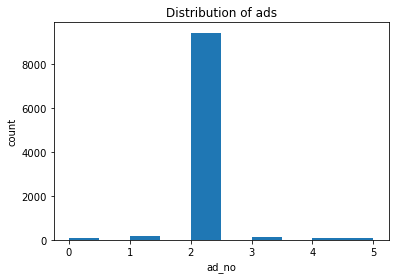

In [9]:
print('total clicks with UCB Algorithm: {}'.format(total_reward_ucb))
#plot- Distribution of ad_selected
plt.hist(ad_selected)
plt.title('Distribution of ads')
plt.xlabel('ad_no')
plt.ylabel('count')
plt.show()

In [11]:
#How many times Ad 3 selected after 1000 rounds till end
no_displayed = pd.Series(ad_selected[1000:N]).value_counts()
select_rate = no_displayed/len(ad_selected[1000:N])
#Let's also look click though rate of diff ad versions
sum_reward.sort(reverse = True)
no_selection.sort(reverse = True)    
click_probability = pd.Series(sum_reward)/pd.Series(no_selection)
ucb_output = pd.DataFrame({'Ad Version':no_displayed.index, 'No Displayed' : no_displayed.values, 'Display Rate' :select_rate.values, 'Click probability(CTR)':click_probability})
ucb_output

,Ad Version,No Displayed,Display Rate,Click probability(CTR)
0,2,8819,0.979889,0.208524
1,3,48,0.005333,0.147368
2,0,43,0.004778,0.114754
3,4,35,0.003889,0.091837
4,1,31,0.003444,0.091837
5,5,24,0.002667,0.072289
